In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.neural_network  import MLPClassifier
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv'

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [62]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,60),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 60), max_iter=300)

In [63]:
y_pred = mlp_clf.predict(trainX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(trainY, y_pred)*100))

Accuracy: 95.55


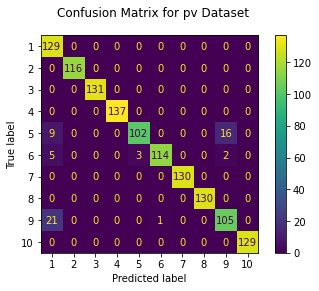

In [64]:
fig = plot_confusion_matrix(mlp_clf, trainX_scaled, trainY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for pv Dataset")
plt.show()

In [65]:
y_pred1 = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred1)*100))

Accuracy: 93.75


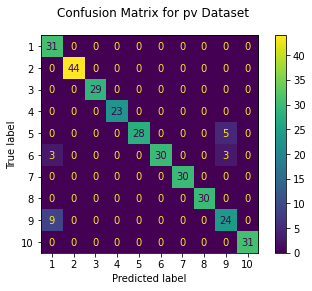

In [66]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for pv Dataset")
plt.show()

In [67]:
YR=np.concatenate((trainY,testY),axis=0)

In [68]:
YP = np.concatenate((y_pred,y_pred1), axis=0)

In [69]:
ac2=accuracy_score(YR,YP)*100
ac2

95.1875